In [3]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC
import seaborn as sns

$$x = A\cos(Bt - \delta)$$

In [4]:

def analytic_sol(t,A,B,delta):
    return A * np.cos(B* t - delta) + sigma * np.random.randn(len(t))

def log_likelihood(theta):
    delta = theta
    sol = analytic_sol(t,A,B,delta)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

1.5707963267948966


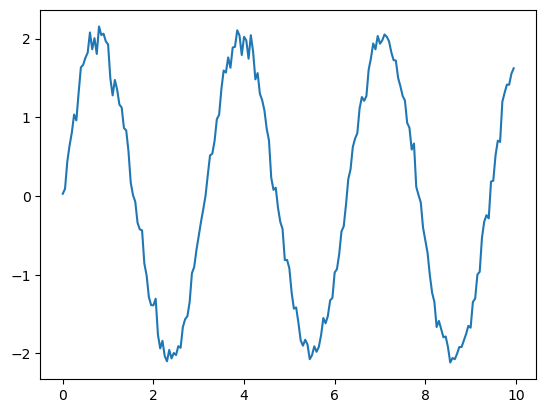

In [6]:
t = np.arange(0,10,0.05)
A = 2.0
sigma = 0.1
B = 2.0
delta_true = np.pi / 2
print(delta_true)
x_true = analytic_sol(t,A,B,delta_true)

plt.plot(t,x_true)
plt.show()

best choice for delta_0: 1.56
delta that gives log likelihood minimum: 4.64


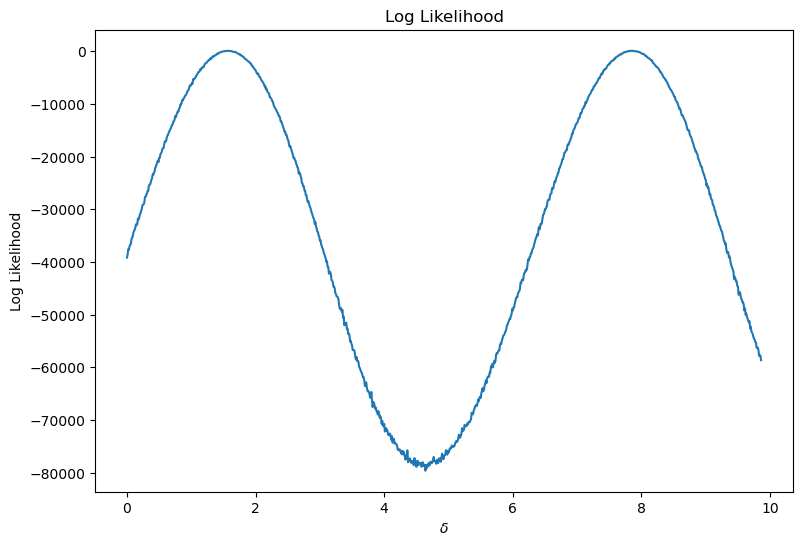

In [7]:
sols = []
deltas = np.arange(0,2*np.pi*delta_true,0.01)
for delta in deltas:
    sols.append(log_likelihood(delta))
print("best choice for delta_0:",deltas[np.argmax(np.array(sols))])
delta_min = deltas[np.argmin(np.array(sols))]
print("delta that gives log likelihood minimum:",delta_min)
plt.figure(figsize=(9,6))
plt.plot(deltas,sols)
plt.title("Log Likelihood")
#plt.ylim(-30000,1000)
plt.xlabel(r"$\delta$")
plt.ylabel("Log Likelihood")
plt.show()

In [39]:
D = 1  

LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds

PLB = np.copy(LB)
PLB[0][0] = 0.5
PUB = np.copy(UB) 
PUB[0][0] =  9.5


x0 = np.atleast_2d(delta_min)

options = {
    "max_fun_evals": 150
}

prior = SplineTrapezoidal(LB, PLB, PUB, UB)

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0.]] PLB: [[0.5]] PUB: [[9.5]] UB: [[10.]] x0: [[4.61]]


In [40]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10        -399.16       288.26          inf        2        inf     start warm-up
     1         15          63.50         0.01        49.13        2        inf     
     2         20       -8972.09       497.67    121478.10        2   4.08e+06     
     3         25        -419.52        31.09     83986.74        2   2.83e+06     
     4         30      -13638.88     13538.56        61.44        2   9.12e+04     
     5         35       -8552.27     11834.42         0.19        2   5.64e+04     
     6         40          75.91        21.42      9097.37        2   3.06e+05     
     7         45          77.15        16.98         0.02        2       6.81     
     8         50          73.53        14.89         0.00        2       6.18     
     9         55          72.76        12.79         0.03        2       5.65     
    10         60          73.71        10.92         0.02        2       4.63     
    11         65          73.46        10.50         0.06     

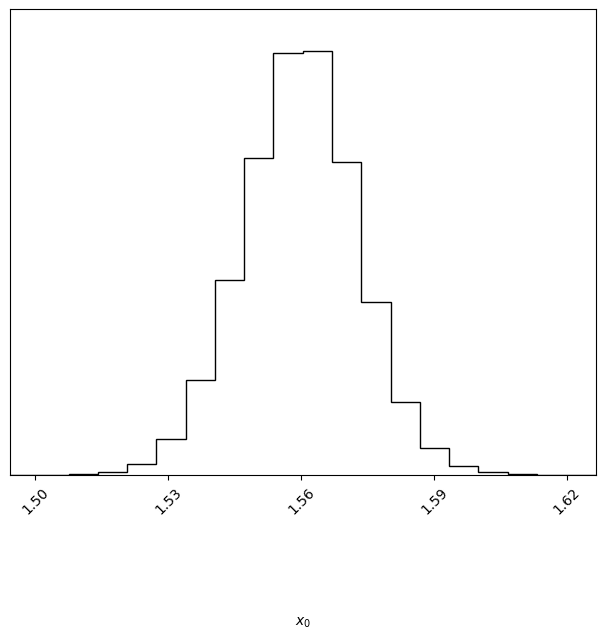

In [41]:
vp.plot();

In [31]:
 sigma * np.random.randn(1,4,len(t))

array([[ 9.53517836e-02, -4.00971626e-02, -7.75324917e-02,
        -3.06202228e-02, -8.55471731e-02, -2.36427616e-02,
         1.69704300e-03,  2.22991254e-02,  1.66176637e-02,
         1.72372086e-02, -6.51570731e-02, -3.31324404e-02,
         3.12242869e-02, -3.72509675e-03, -5.14865033e-02,
        -6.81086297e-02, -7.04062671e-02, -1.85184820e-02,
         1.57319711e-02,  4.76549606e-02, -1.09660550e-01,
        -3.70726754e-02, -2.47298922e-02, -6.43006584e-02,
         1.24488436e-01,  5.35722958e-02,  8.45855663e-03,
         3.13307987e-02, -3.35914510e-02, -4.92517000e-03,
         6.28244378e-02,  4.54466171e-04, -4.76006646e-02,
         8.09496098e-02,  7.29288583e-03, -3.56675949e-02,
         6.84515562e-03,  8.05447820e-03, -1.68995742e-02,
        -5.21829470e-02, -3.93589231e-02, -3.03824918e-02,
        -7.75024537e-03,  2.07020323e-02, -2.74020564e-02,
         8.93606336e-02,  3.64205936e-02,  5.86196352e-02,
        -1.85052567e-02,  2.48094502e-02, -4.97360526e-0

In [50]:
def log_likelihood(theta):
    delta,A = theta
    sol = analytic_sol(t,A,B,delta)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

D = 2
LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds
# LB[0][0] = 0.0
# LB[0][1] = 1.0
# UB[0][0] = 0.99

PUB = np.copy(UB) 
PUB[0][0] = 9.5
PUB[0][1] = 9.5
PLB = np.copy(LB)
PLB[0][0] = 0.5
PLB[0][1] = 0.5

x0 = 3 * np.ones((1, D))
x0[0][0] = delta_min
prior = SplineTrapezoidal(LB, PLB, PUB, UB)

options = {
    "max_fun_evals": 500
}

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0. 0.]] PLB: [[0.5 0.5]] PUB: [[9.5 9.5]] UB: [[10. 10.]] x0: [[4.61 3.  ]]


In [51]:
vbmc2 = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp2, results2 = vbmc2.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10      -11395.12     21014.34          inf        2        inf     start warm-up
     1         15       -3172.63     13229.94      5087.05        2        inf     
     2         20       -9413.89      8242.75       388.53        2   5.74e+04     
     3         25       -4367.27      4636.72      1233.07        2   6.13e+04     
     4         30      -17639.87     11537.62    136093.82        2   3.29e+06     
     5         35      -11819.08      1711.72    145274.86        2   3.45e+06     
     6         40      -11214.50      4246.76      2429.17        2   7.34e+04     
     7         45       -8813.20      3335.43       617.30        2   3.37e+04     
     8         50       -8894.03      8817.71      1090.86        2   5.54e+04     
     9         55       -9374.63      8365.61      5125.33        2    1.5e+05     
    10         60       -5518.17     11312.39     26093.61        2   6.66e+05     
    11         65      -12166.39      2234.87    164890.19     

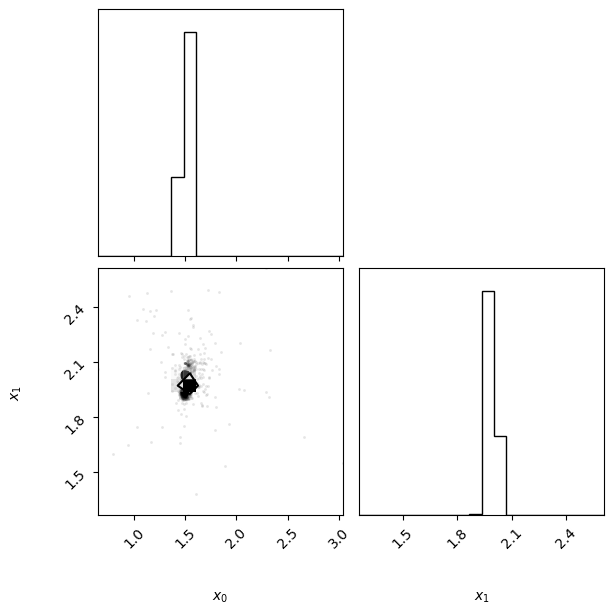

In [58]:
vp2.plot();

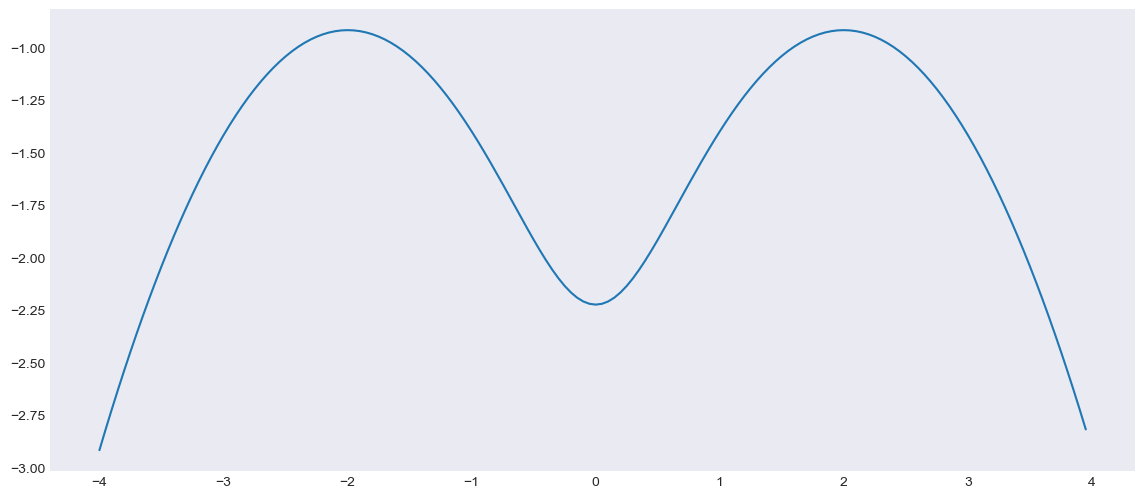

In [141]:
import scipy.stats as scs
norm1 = scs.norm(loc = -2.0, scale = 1.0)
norm2 = scs.norm(loc = 2.0, scale = 1.0)
x = np.arange(-4,4,0.05)
dual_pdf = norm1.pdf(x) + norm2.pdf(x)

plt.plot(x,np.log(dual_pdf))

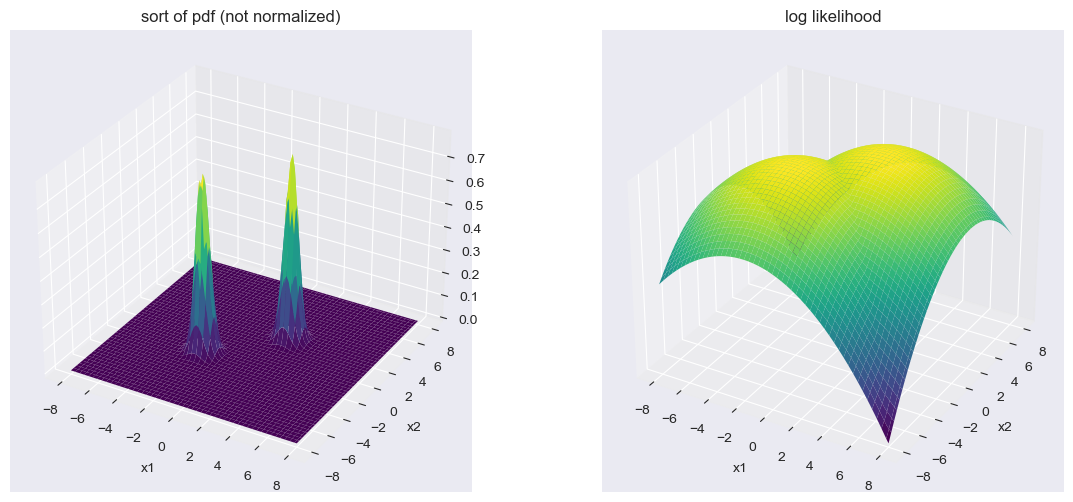

In [150]:
sigma = 0.2
norm1 = scs.multivariate_normal(mean = np.array([2,2]), cov = np.array([[sigma,0],[0,sigma]]))
norm2 = scs.multivariate_normal(mean = np.array([-2,-2]), cov = np.array([[sigma,0],[0,sigma]]))

double_pdf = lambda x: norm1.pdf(x) + norm2.pdf(x)
log_likelihood = lambda x: np.log(double_pdf(x))

x = np.linspace(-8, 8, num=100)
y = np.linspace(-8, 8, num=100)
X, Y = np.meshgrid(x,y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = double_pdf([X[i,j], Y[i,j]])

logpdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        logpdf[i,j] = log_likelihood([X[i,j], Y[i,j]])

fig = plt.figure()	
ax1 = fig.add_subplot(121, projection = '3d')
ax1.plot_surface(X, Y, pdf, cmap = 'viridis')
ax1.set_title("sort of pdf (not normalized)")
plt.xlabel("x1")
plt.ylabel("x2")
ax.axes.zaxis.set_ticks([])


ax2 = fig.add_subplot(122, projection = '3d')
ax2.plot_surface(X, Y, logpdf, cmap = 'viridis')
ax2.set_title("log likelihood")
plt.xlabel("x1")
plt.ylabel("x2")
ax2.axes.zaxis.set_ticks([])
plt.show()

In [133]:
D = 2
LB = np.full((1, D), -10.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds


PLB = np.full((1, D), -4.0)  # Plausible Lower bounds
PUB = np.full((1, D), 4.0)  # Plausible Upper bounds

x0 = 2 * np.ones((1, D))

prior = SplineTrapezoidal(LB, PLB, PUB, UB)

options = {
    "max_fun_evals": 500
}

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[-10. -10.]] PLB: [[-4. -4.]] PUB: [[4. 4.]] UB: [[10. 10.]] x0: [[2. 2.]]


In [134]:
vbmc3 = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp3, results3 = vbmc3.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10         -19.69         7.79  57291020.77        2        inf     start warm-up
     1         15          -7.25         3.71         2.54        2        inf     
     2         20          -5.63         0.99         0.31        2       16.1     
     3         25          -4.56         0.02         0.14        2       6.98     
     4         30          -4.55         0.01         0.00        2      0.105     
     5         35          -4.55         0.00         0.00        2     0.0251     
     6         40          -4.59         0.00         0.00        2      0.192     end warm-up
     7         45          -4.55         0.00         0.00        2      0.167     
     8         50          -4.59         0.00         0.00        2      0.153     
     9         55          -4.59         0.00         0.00        5     0.0162     
    10         60          -4.58         0.00         0.00        8     0.0273     rotoscale, undo rotoscale
    11         65          

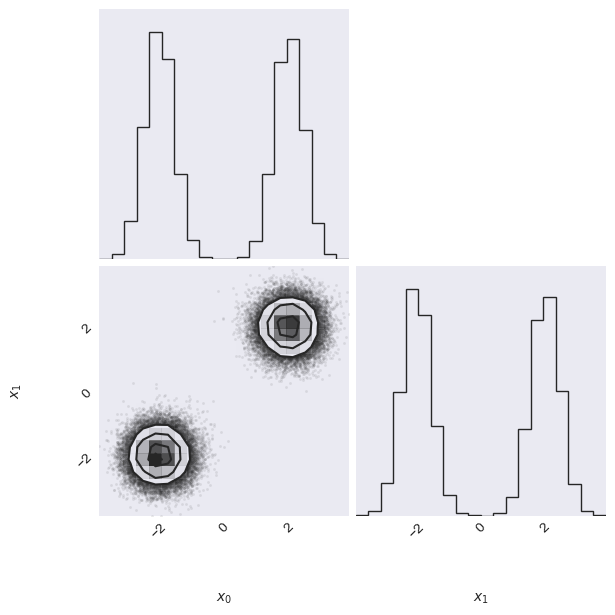

In [136]:
vp3.plot();

In [138]:
vp3.save("doubly_peaked_vp.pkl")

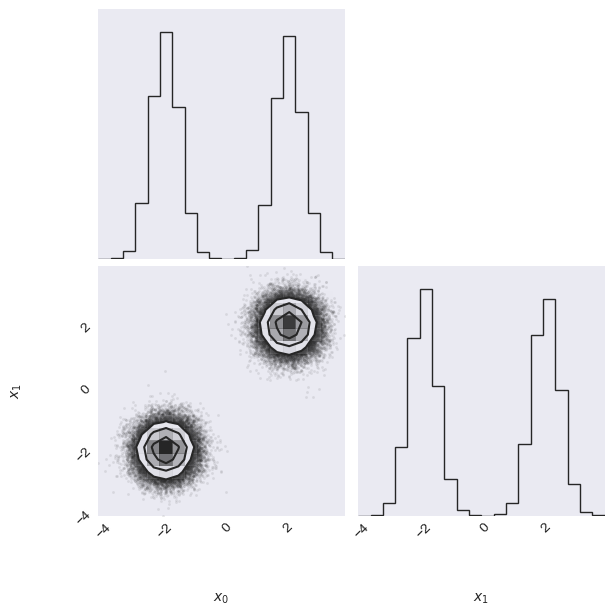

In [140]:
from pyvbmc import VariationalPosterior

doubly_peaked_vp = VariationalPosterior.load("doubly_peaked_vp.pkl")

doubly_peaked_vp.plot();

1.5707963267948966


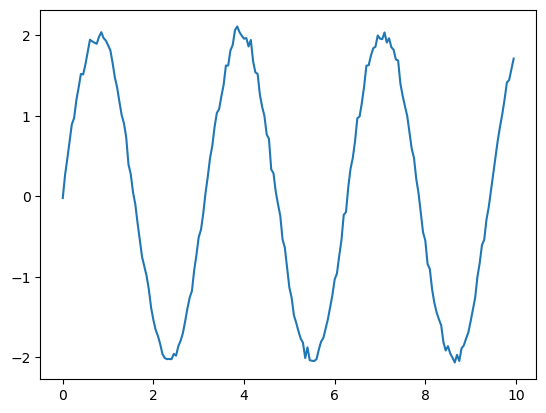

In [10]:
t = np.arange(0,10,0.05)
A = 2.0
B = 2.0
sigma = 0.05
delta_true = np.pi / 2
print(delta_true)
x_true = analytic_sol(t,A,B,delta_true)

plt.plot(t,x_true)
plt.show()

In [19]:
def log_likelihood(theta):
    delta,A,B = theta
    sol = analytic_sol(t,A,B,delta)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

D = 3
LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds

PLB = np.full((1, D), 0.5)
PUB = np.full((1, D), 9.5)

x0 = 3 * np.ones((1, D))
x0[0][0] = delta_min
prior = SplineTrapezoidal(LB, PLB, PUB, UB)

options = {
    "max_fun_evals": 500
}

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0. 0. 0.]] PLB: [[0.5 0.5 0.5]] PUB: [[9.5 9.5 9.5]] UB: [[10. 10. 10.]] x0: [[4.64 3.   3.  ]]


In [20]:
vbmc4 = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp4, results4 = vbmc4.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10      -74546.81     22348.56          inf        2        inf     start warm-up
     1         15      -69203.57     39317.61 431348354.72        2        inf     
     2         20      -83554.72      4987.96    211185.49        2   4.13e+06     
     3         25      -69431.74     15660.55 12358545002.29        2   2.38e+11     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),


     4         30      -79499.07      1139.82    177346.10        2   3.45e+06     
     5         35      -79843.79       944.70     13958.58        2   2.73e+05     
     6         40      -62414.33     16591.94 7032736349.94        2   1.35e+11     
     7         45      -65628.76     15959.82     13033.18        2   3.15e+05     
     8         50      -74972.59      4056.26     83390.86        2   1.65e+06     
     9         55      -74113.50      6613.77       217.68        2   2.91e+04     
    10         60      -64697.31     11435.40      1002.73        2   8.88e+04     
    11         65      -72180.66     11989.16       685.97        2   7.81e+04     
    12         70      -63835.76     14136.08      1311.54        2      1e+05     
    13         75      -73338.04     16750.60    282556.15        2   5.53e+06     
    14         80      -66953.14     22328.94     17807.71        2   4.38e+05     trim data
    15         85      -76351.72      5662.63   2369048.25        

c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3823: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range = max(es.fit.fit) - min(es.fit.fit)


    42        220      -62983.85      3241.03     19020.31        9   3.83e+05     
    43        225      -51450.59      3855.40  15216133.78        9   2.93e+08     
    44        230      -53085.48      3668.56      3652.54        9    8.8e+04     switch to GP opt
    45        235      -53084.46      4293.33       168.03        9   1.75e+04     
    46        240      -53087.42      4119.62         8.99        9   1.39e+04     
    47        245      -53086.61      4250.72        17.25        9   1.45e+04     
    48        250      -55520.76      2000.82      1791.57        9   4.93e+04     
    49        255      -58866.13       669.07       665.00       10   2.62e+04     
    50        260      -58868.32      2309.05        10.84       11   7.91e+03     
    51        265      -66280.41      1933.23      8190.78       11   1.89e+05     
    52        270      -65590.14      3408.08    430598.93       11    8.3e+06     
    53        275      -58868.49      2960.07   1693793.60  

c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3824: RuntimeWarning: invalid value encountered in scalar subtract
  historic_fitness_range = max(es.fit.hist) - min(es.fit.hist)


    62        320      -58881.62      4018.65       131.68       13    1.6e+04     
    63        325      -65758.98      2644.38      6428.03       13   1.55e+05     
    64        330      -58936.88      3413.80      8318.97       13   1.94e+05     
    65        335      -58879.03      3641.93        26.54       13   1.28e+04     
    66        340      -65905.35      2070.59     27961.31       13   5.68e+05     
    67        345      -65849.79      2236.35        26.12       13   8.14e+03     
    68        350      -65836.60      2695.80         8.10       13   9.19e+03     
    69        355      -65797.46      2733.51        22.78       13   9.68e+03     
    70        360      -65947.76      3141.68        17.49       13   1.13e+04     
    71        365      -65920.70      3223.64         0.85       13   1.09e+04     
    72        370      -58885.91      4407.14   3615090.88       13   6.96e+07     
    73        375      -65967.20      3568.19   7860060.01       14   1.51e+

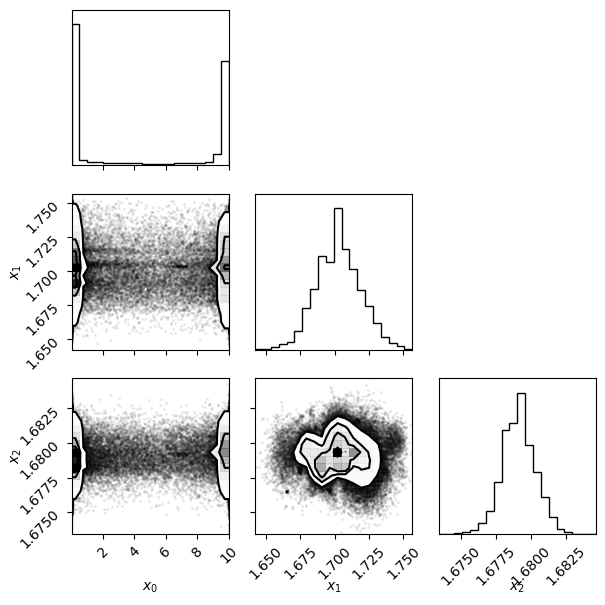

In [21]:
vp4.plot();

In [22]:
vp4.moments()

array([[4.44759698, 1.70286852, 1.67912972]])

In [23]:
print(delta,A,B)

9.86 2.0 2.0


In [24]:
print(np.pi/2, 2 * np.pi * np.pi / 2)

1.5707963267948966 9.869604401089358


In [25]:
vp4.save("3D_vp.pkl")